In [149]:
import pandas as pd 
import urllib
import re
import numpy as np

In [95]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import sys, json
import os
from pathlib import Path
import pandas as pd

<div class="alert alert-block alert-info" align=center><b></b>

## Load Revenue Data

In [245]:
#ticks = pd.read_csv(r'/Users/eviekiwi/CS506Spring2021Repository/10_K_Risk_Evaluator/data/actual.csv')
ticks = open('/Users/eviekiwi/CS506Spring2021Repository/10_K_Risk_Evaluator/data/actual.csv', 'r')
all_ticks = ticks.read().split('\n')
tickers = all_ticks[1:-1]

In [97]:
revenue = pd.read_csv('revenue.csv')
revenue

,company,new_revenue,old_revenue,delta
0,ABUS,6011000,5945000,1.0
1,ACAD,223807000,124901000,1.0
2,ADAP,1122000,59505000,0.0
3,ADPT,85071000,55663000,1.0
4,ADVM,250000000,1612000000,0.0
...,...,...,...,...
172,XERS,1627000,0,NaN
173,XLRN,73993000,13991000,1.0
174,XNCR,11564000,29039000,0.0
175,YMAB,63492000,34269000,1.0


In [98]:
revenue_clean = revenue.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
revenue_clean

,company,new_revenue,old_revenue,delta
0,ABUS,6011000,5945000,1.0
1,ACAD,223807000,124901000,1.0
2,ADAP,1122000,59505000,0.0
3,ADPT,85071000,55663000,1.0
4,ADVM,250000000,1612000000,0.0
...,...,...,...,...
170,XBIT,24090000,15725000,1.0
171,XENE,311000,23634000,0.0
173,XLRN,73993000,13991000,1.0
174,XNCR,11564000,29039000,0.0


In [239]:
companies = list(revenue_clean['company'])
#companies
revenue_delta = list(revenue_clean['delta'])

In [100]:
local_location = '/Users/eviekiwi/Documents/2021Spring/CS506/project/webscrape/sec-edgar-filings'
base_url = r"https://www.sec.gov/Archives/edgar/data/"
full_path = Path(local_location)

<div class="alert alert-block alert-info" align=center><b></b>

## Extract URL and Texts, append to DF

In [101]:
#tickers = ['ABUS', 'ACAD', 'ADAP', 'ADPT', 'ADVM', 'AERI','AGIO','AGLE','AKBA','AKRO']

all_txt = []
for t in companies: 
    company = local_location+'/'+ t
    path = Path(company)
    txt_files = list(path.glob('**/*.txt'))
    all_txt.append(txt_files)
    
    
file_url = []

for i in range(len(all_txt)):
    f = all_txt[i][0]
    file = open(str(f), 'r').readlines()
    for line in file: 
        line = line.strip().split('\t')
        if 'ACCESSION NUMBER:' in line: 
            accession_num = line[2]
            accession_num_rmv = accession_num.replace('-','')
        elif 'CENTRAL INDEX KEY:' in line: 
            central_key = line[3]
        url = base_url + central_key + '/' + accession_num_rmv + '/' + accession_num + '.txt'
    file_url.append(url)

In [103]:
dic = {'tickers': companies, 'text': file_url, 'revenue': revenue_delta}
final_data = pd.DataFrame(dic)

In [104]:
final_data['link_text'] = ''
final_data

,tickers,text,revenue,link_text
0,ABUS,https://www.sec.gov/Archives/edgar/data/000144...,1.0,
1,ACAD,https://www.sec.gov/Archives/edgar/data/000107...,1.0,
2,ADAP,https://www.sec.gov/Archives/edgar/data/000162...,0.0,
3,ADPT,https://www.sec.gov/Archives/edgar/data/000147...,1.0,
4,ADVM,https://www.sec.gov/Archives/edgar/data/000150...,0.0,
...,...,...,...,...
161,XBIT,https://www.sec.gov/Archives/edgar/data/000162...,1.0,
162,XENE,https://www.sec.gov/Archives/edgar/data/000158...,0.0,
163,XLRN,https://www.sec.gov/Archives/edgar/data/000128...,1.0,
164,XNCR,https://www.sec.gov/Archives/edgar/data/000132...,0.0,


In [105]:
for rownum, row in final_data.iterrows():
    try:
        html = row['text']
        #print(html)
        with urllib.request.urlopen(html) as url:
            text = url.read()
            text_data = text.decode("utf-8") 
            #blacklist = ['a','sequence','filename','description']
            final_data['link_text'][rownum] = text_data


    except:
        pass


/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [106]:
final_data

,tickers,text,revenue,link_text
0,ABUS,https://www.sec.gov/Archives/edgar/data/000144...,1.0,<SEC-DOCUMENT>0001447028-20-000038.txt : 20200...
1,ACAD,https://www.sec.gov/Archives/edgar/data/000107...,1.0,<SEC-DOCUMENT>0001564590-19-004596.txt : 20190...
2,ADAP,https://www.sec.gov/Archives/edgar/data/000162...,0.0,<SEC-DOCUMENT>0001558370-20-001571.txt : 20200...
3,ADPT,https://www.sec.gov/Archives/edgar/data/000147...,1.0,<SEC-DOCUMENT>0001564590-20-006830.txt : 20200...
4,ADVM,https://www.sec.gov/Archives/edgar/data/000150...,0.0,
...,...,...,...,...
161,XBIT,https://www.sec.gov/Archives/edgar/data/000162...,1.0,<SEC-DOCUMENT>0001171843-20-001761.txt : 20200...
162,XENE,https://www.sec.gov/Archives/edgar/data/000158...,0.0,<SEC-DOCUMENT>0001564590-19-006514.txt : 20190...
163,XLRN,https://www.sec.gov/Archives/edgar/data/000128...,1.0,<SEC-DOCUMENT>0001280600-20-000012.txt : 20200...
164,XNCR,https://www.sec.gov/Archives/edgar/data/000132...,0.0,<SEC-DOCUMENT>0001558370-19-001049.txt : 20190...


<div class="alert alert-block alert-info" align=center><b></b>

## Clean Texts

In [107]:
#creating a dictionary of contractions 

contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [108]:
#function for defining contraction's:

def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

#function for removing unicode data :

import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

#function for removing all the scrub words
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text until space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

In [109]:
#using contractions dictionary to make corrections 
final_data['link_text'] = [expand_contractions(re.sub('’', "'", text)) for text in final_data['link_text']]

#stripping the words using space 
final_data['link_text'] = [text.strip().lower() for text in final_data['link_text']]

#removing accented characters 
final_data['link_text'] = [remove_accented_chars(text) for text in final_data['link_text']]

#re-placing " " " with space 
final_data['link_text'] = [text.replace('"', '') for text in final_data['link_text']]

# Removing url's from the text
url_reg  = r'[a-z]*[:.]+\S+'
final_data['link_text'] = [re.sub(url_reg, '', text) for text in final_data['link_text']]

final_data['link_text'] = [re.sub(r"\b[a-zA-Z]\b", "", text) for text in final_data['link_text']]

#removing scrub_words
final_data['link_text'] = [scrub_words(text) for text in final_data['link_text']]

#replace spaaces more than one with single space 
final_data['link_text'] = [re.sub("\s+", ' ', text) for text in final_data['link_text']]

#finding the length of the words in the data
final_data['word_count'] = [len(text.split(' ')) for text in final_data['link_text']]

In [110]:
final_data['word_count'].describe()

count    1.660000e+02
mean     6.593930e+05
std      5.120325e+05
min      1.000000e+00
25%      1.000000e+00
50%      6.994420e+05
75%      9.400242e+05
max      2.771774e+06
Name: word_count, dtype: float64

In [111]:
stopwords = ['dtd','copyright','llc','en','html','fe','ed','webfilings','e','vk','g','zip code', 'pagebreak','html' 
             'w','c','en','table','body','par','value','per','securities','exchange','comission','telephone','number',
             'zip', 'code', 'end', 'page','xbrl','begin','dc','aa','aaa', 'aaa aa','ab','abn','abn amro','abnormal',
             'abo','abs','ac','az','ba','baa','aoci','aol','apb','api','app','ann','anne','amp','amt','anda','bla','bit',
             'bio','bhc','bb','bbb','bbl','bbls','bc','bcf','bcfe','apr','arc','aro','asa','asa','asc','asic','asp','asr',
             'asu','asus','ave','bms','bnp','bny','boe','blvd','bms','boe','bps','bs','btu', 'btus','ca','cad','cal','ccc',
             'cceeff','cdo','cdos','cds','ce','cede','cg','chk','cmsa','col','com','con','conway','ct','dd','de','dan',
             'dana','dea','wti','wto','wv','wyeth','wyoming','xannual','xerox','xi','xii','xiii','xindicate','xiv','xix','xl',
             'xthe','xv','xvi','xvii','xviii', 'xx','xxi','xxx','wi','vt','vs','von''vie','via','vi','var','ta','tab','tam',
             'td','tdr','tdrs','te','sur','ss','sr','sq','sp','sop','sip','sd','sdn','se', 'div', 'sec', 'document', 'accession', 'submission', 'public'
             '__________________________________________ '
            '__________ ']

## remove words less than 4 characters

In [112]:
def review_to_words(raw_review):
    
    remove = re.sub(r'\b\w{1,3}\b', '', raw_review) #removing all words less than 4 characters 
    letters_only = re.sub("[^a-zA-Z]", " ", remove) 
    word = letters_only.lower().split()
  
    meaningful_words = [w for w in word if not w in stopwords] 
    return( " ".join(meaningful_words))
 

In [113]:
no_of_rows = len(final_data)
print(no_of_rows)

# Initialize an empty list to hold the clean reviews
stopwords_text = []

# Loop over each review; create an index i that goes from 0 to the length of the movie review list 
for i in range(0, no_of_rows):
    stopwords_text.append(review_to_words(final_data['link_text'][i]))  
#   print("Done {}." .format(i))
data = stopwords_text
print("LEVEL_2 CLEANING IS DONE!!!")

166
LEVEL_2 CLEANING IS DONE!!!


In [117]:
print(type(data))
print(len(data[0]))

<class 'list'>
2310291


In [118]:
# merging the new cleaned text data with the main data  
train_clean_data = pd.DataFrame(data= data, columns=['clean_text'])

train_data = pd.concat([final_data, train_clean_data],axis=1)

train_data.drop(columns=['link_text','word_count'], axis=1, inplace=True)

In [120]:
train_data.shape

(166, 4)

In [122]:
#writing it into a csv file for next steps 

train_data.to_csv("train_data_phd_submission.csv", index=False, columns=['tickers','text','revenue','clean_text'])

#same steps to be followed to the test data preprocessing

In [123]:
#read the saved train data file for NEXT steps in predicting the long_term outlook 

train_data = pd.read_csv("train_data_phd_submission.csv", usecols = ['tickers','text','revenue','clean_text'])

In [124]:
#train_data.head()
train_data = train_data.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)


In [125]:
train_data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

,tickers,text,revenue,clean_text
0,ABUS,https://www.sec.gov/Archives/edgar/data/000144...,1.0,header acceptance datetime conformed type publ...
1,ACAD,https://www.sec.gov/Archives/edgar/data/000107...,1.0,header acceptance datetime conformed type publ...
2,ADAP,https://www.sec.gov/Archives/edgar/data/000162...,0.0,header acceptance datetime conformed type publ...
3,ADPT,https://www.sec.gov/Archives/edgar/data/000147...,1.0,header acceptance datetime conformed type publ...
6,AKRO,https://www.sec.gov/Archives/edgar/data/000174...,1.0,header acceptance datetime conformed type publ...
...,...,...,...,...
161,XBIT,https://www.sec.gov/Archives/edgar/data/000162...,1.0,header acceptance datetime conformed type publ...
162,XENE,https://www.sec.gov/Archives/edgar/data/000158...,0.0,header acceptance datetime conformed type publ...
163,XLRN,https://www.sec.gov/Archives/edgar/data/000128...,1.0,header acceptance datetime conformed type publ...
164,XNCR,https://www.sec.gov/Archives/edgar/data/000132...,0.0,header acceptance datetime conformed type publ...


In [130]:
#EDA using keras packages 

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



MAX_NB_WORDS = 900802

# get the raw text data
texts_train = train_data['clean_text'].astype(str)
#texts_test = test_text.astype(str)
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)

/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [133]:
sequences = tokenizer.texts_to_sequences(texts_train)
#sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 1274194 unique tokens.


In [238]:
list(word_index.items())[0:10] 
len(word_index)

1274194

In [150]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())
" ".join([index_to_word[i] for i in sequences[0]])
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 468922.0
max length: 900802


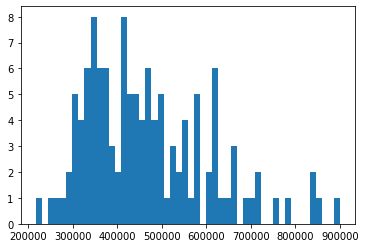

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=50);

In [170]:
train = train_data[0:90]
test = train_data[90::]

<div class="alert alert-block alert-info" align=center><b></b>

## Functions loading financial vocabularies and calculating sentiment scores

In [181]:
#define functions and creating new columns 

# Generic stop wordss list from the mcdonald weblink\

stopWordsFile = 'stopwords_generic.txt'
with open(stopWordsFile ,'r') as stop_words:
    stopWords = stop_words.read().lower()
stopWordList = stopWords.split('\n')
stopWordList[-1:] = []
# Tokenizer
def tokenizer(text):
    text = text.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    filtered_words = list(filter(lambda token: token not in stopWordList, tokens))
    return filtered_words

#===============================================================================
# Loading positive words
positiveWordsFile = 'positive_words.txt'
with open(positiveWordsFile,'r') as posfile:
    positivewords=posfile.read().lower()
positiveWordList=positivewords.split('\n')

# Calculating positive score 
def positive_score(text):
    numPosWords = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in positiveWordList:
            numPosWords  += 1
    
    sumPos = numPosWords
    return sumPos
#===============================================================================
# Loading negative words
nagitiveWordsFile = 'negative_words.txt'
with open(nagitiveWordsFile ,'r') as negfile:
    negativeword=negfile.read().lower()
negativeWordList=negativeword.split('\n')


# Calculating Negative score
def negative_word(text):
    numNegWords=0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in negativeWordList:
            numNegWords -=1
    sumNeg = numNegWords 
    sumNeg = sumNeg * -1
    return sumNeg
#===============================================================================
# Loading litigous words
litigous = 'litiguous.txt'
with open(litigous ,'r') as litfile:
    litigousword=litfile.read().lower()
litigouswordlist =litigousword.split('\n')


# Calculating litigous score 
def litigous_score(text):
    numLitWords = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in litigouswordlist:
            numLitWords  += 1
    
    sumLit = numLitWords
    return sumLit

#===============================================================================
# Loading Modalstrong words
modalstrongfile = 'modal_strong.txt'
with open(modalstrongfile ,'r') as modfile:
    modstrongword=modfile.read().lower()
modstrongwordlist=modstrongword.split('\n')


# Calculating modal strongscore 
def modal_strong_store(text):
    nomodstr = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in modstrongwordlist:
            nomodstr  += 1
    
    summodstr = nomodstr
    return summodstr

#===============================================================================
# Loading modal_weak words
modal_weak_file = 'modal_weak.txt'
with open(modal_weak_file ,'r') as modweak:
    modweakword=modweak.read().lower()
modweaklist=modweakword.split('\n')


# Calculating mod_weak_score 
def mod_weak_score(text):
    nomodweak = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in modweaklist:
            nomodweak  += 1
    
    summodweak = nomodweak
    return summodweak
	

#===============================================================================
# Calculating polarity score
def polarity_score(positiveScore, negativeScore):
    pol_score = (positiveScore - negativeScore) / ((positiveScore + negativeScore) + 0.000001)
    return pol_score

#===============================================================================
# Calculating Average sentence length 

'''# It will calculated using formula --- 
      Average Sentence Length = the number of words / the number of sentences'''
     
def average_sentence_length(text):
    sentence_list = sent_tokenize(text)
    tokens = tokenizer(text)
    totalWordCount = len(tokens)
    totalSentences = len(sentence_list)
    average_sent = 0
    if totalSentences != 0:
        average_sent = totalWordCount / totalSentences
    
    average_sent_length= average_sent
    
    return round(average_sent_length)
#===============================================================================
# Calculating percentage of complex words

''' It is calculated using Percentage of 
            Complex words = the number of complex words / the number of words''' 

def percentage_complex_word(text):
    tokens = tokenizer(text)
    complexWord = 0
    complex_word_percentage = 0
    
    for word in tokens:
        vowels=0
        if word.endswith(('es','ed')):
            pass
        else:
            for w in word:
                if(w=='a' or w=='e' or w=='i' or w=='o' or w=='u'):
                    vowels += 1
            if(vowels > 2):
                complexWord += 1
    if len(tokens) != 0:
        complex_word_percentage = complexWord/len(tokens)
    
    return complex_word_percentage
#===============================================================================

# calculating Fog Index 

'''# Fog index is calculated using --
    Fog Index = 0.4 * (Average Sentence Length + Percentage of Complex words)'''

def fog_index(averageSentenceLength, percentageComplexWord):
    fogIndex = 0.4 * (averageSentenceLength + percentageComplexWord)
    return fogIndex

#===============================================================================
# Counting complex words
def complex_word_count(text):
    tokens = tokenizer(text)
    complexWord = 0
    
    for word in tokens:
        vowels=0
        if word.endswith(('es','ed')):
            pass
        else:
            for w in word:
                if(w=='a' or w=='e' or w=='i' or w=='o' or w=='u'):
                    vowels += 1
            if(vowels > 2):
                complexWord += 1
    return complexWord
#===============================================================================
#Counting total words

def total_word_count(text):
    tokens = tokenizer(text)
    return len(tokens)


#===============================================================================
# calculating constraining score
constraining_dictionaryFile = 'constrained.txt'
with open(constraining_dictionaryFile ,'r') as constraining_dict:
    constrainDict=constraining_dict.read().lower()
constrainDictionary = constrainDict.split('\n')


def constraining_score(text):
    constrainWordnum =0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in constrainDictionary:
            constrainWordnum +=1
    sumConstrainScore = constrainWordnum 
    
    return sumConstrainScore
#===============================================================================
# Calculating positive word proportion
def positive_word_prop(positiveScore,wordcount):
    positive_word_proportion = 0
    if wordcount !=0:
        positive_word_proportion = positiveScore / wordcount
        
    return positive_word_proportion

#===============================================================================
# Calculating negative word proportion

def negative_word_prop(negativeScore,wordcount):
    negative_word_proportion = 0
    if wordcount !=0:
        negative_word_proportion = negativeScore / wordcount
        
    return negative_word_proportion
#===============================================================================
# Calculating uncertain word proportion
def uncertain_word_prop(uncertainScore,wordcount):
    uncertain_word_proportion = 0
    if wordcount !=0:
        uncertain_word_proportion = uncertainScore / wordcount
        
    return uncertain_word_proportion

#===============================================================================
# Calculating uncertain word proportion
def uncertain_word_prop(uncertainScore,wordcount):
    uncertain_word_proportion = 0
    if wordcount !=0:
        uncertain_word_proportion = uncertainScore / wordcount
        
    return uncertain_word_proportion

#===============================================================================
# Calculating constraining word proportion
def constraining_word_prop(constrainingScore,wordcount):
    constraining_word_proportion = 0
    if wordcount !=0:
        constraining_word_proportion = constrainingScore / wordcount
        
    return constraining_word_proportion
#===============================================================================
# calculating Constraining words for whole report
def constrain_word_whole(mdaText):
    wholeDoc = mdaText
    constrainWordnumWhole =0
    rawToken = tokenizer(wholeDoc)
    for word in rawToken:
        if word in constrainDictionary:
            constrainWordnumWhole +=1
    sumConstrainScoreWhole = constrainWordnumWhole 
    
    return sumConstrainScoreWhole
#===============================================================================
  

In [184]:
#create a column from the text by the no count's occoured in the data 
from nltk.tokenize import RegexpTokenizer

train['positive_score'] = train.clean_text.apply(positive_score)
test['positive_score'] = test.clean_text.apply(positive_score)


/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [186]:
#applying it on the train & test data 
train['negative_score'] = train.clean_text.apply(negative_word)
test['negative_score'] = test.clean_text.apply(negative_word)

train['litigous_score'] = train.clean_text.apply(litigous_score)
test['litigous_score'] = test.clean_text.apply(litigous_score)

/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [189]:
train['modal_strong'] = train.clean_text.apply(modal_strong_store)
test['modal_strong'] = test.clean_text.apply(modal_strong_store)


train['modal_weak'] = train.clean_text.apply(mod_weak_score)
test['modal_weak'] = test.clean_text.apply(mod_weak_score)

train['polarity_score'] = np.vectorize(polarity_score)(train['positive_score'],train['negative_score'])
test['polarity_score'] = np.vectorize(polarity_score)(test['positive_score'],test['negative_score'])



train['complex_words_p'] = train.clean_text.apply(percentage_complex_word)
test['complex_eords_p'] = test.clean_text.apply(percentage_complex_word)


/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [195]:
train['complex_words_p'] = train.clean_text.apply(percentage_complex_word)
test['complex_eords_p'] = test.clean_text.apply(percentage_complex_word)



train['complex_word_cout']= train.clean_text.apply(complex_word_count)
test['complex_word_cout']= test.clean_text.apply(complex_word_count)


train['word_count'] = train.clean_text.apply(total_word_count)
test['word_count'] = test.clean_text.apply(total_word_count)


/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [197]:
train['constraining_scores'] = train.clean_text.apply(constraining_score)
test['constraining_scores'] = test.clean_text.apply(constraining_score)


train['positive_word_proportion'] = np.vectorize(positive_word_prop)(train['positive_score'],train['word_count'])
test['positive_word_proportion'] = np.vectorize(positive_word_prop)(test['positive_score'],test['word_count'])


train['negative_word_proportion'] = np.vectorize(negative_word_prop)(train['negative_score'],train['word_count'])
test['negative_word_proportion'] = np.vectorize(negative_word_prop)(test['negative_score'],test['word_count'])

train['constraining_word_proportion'] = np.vectorize(constraining_word_prop)(train['constraining_scores'],train['word_count'])
test['constraining_word_proportion'] = np.vectorize(constraining_word_prop)(test['constraining_scores'],test['word_count'])

/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [198]:
train

,tickers,text,revenue,clean_text,positive_score,negative_score,litigous_score,modal_strong,modal_weak,polarity_score,complex_words_p,complex_word_cout,word_count,constraining_scores,positive_word_proportion,negative_word_proportion,constraining_word_proportion
0,ABUS,https://www.sec.gov/Archives/edgar/data/000144...,1.0,header acceptance datetime conformed type publ...,4008,2173,2077,281,228,0.296878,0.214171,67453,314950,748,0.012726,0.006900,0.002375
1,ACAD,https://www.sec.gov/Archives/edgar/data/000107...,1.0,header acceptance datetime conformed type publ...,3894,4435,5179,712,307,-0.064954,0.174855,82433,471435,1727,0.008260,0.009407,0.003663
2,ADAP,https://www.sec.gov/Archives/edgar/data/000162...,0.0,header acceptance datetime conformed type publ...,6238,5223,5725,1080,421,0.088561,0.226029,136578,604250,2289,0.010324,0.008644,0.003788
3,ADPT,https://www.sec.gov/Archives/edgar/data/000147...,1.0,header acceptance datetime conformed type publ...,4756,4067,3385,361,480,0.078091,0.257016,111770,434876,1623,0.010936,0.009352,0.003732
6,AKRO,https://www.sec.gov/Archives/edgar/data/000174...,1.0,header acceptance datetime conformed type publ...,3838,4129,3961,531,416,-0.036526,0.162354,76182,469233,1768,0.008179,0.008799,0.003768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,OPK,https://www.sec.gov/Archives/edgar/data/000094...,0.0,header acceptance datetime conformed type publ...,6743,4881,5051,474,506,0.160186,0.274572,156455,569814,1843,0.011834,0.008566,0.003234
117,ORTX,https://www.sec.gov/Archives/edgar/data/000174...,1.0,header acceptance datetime conformed type publ...,5383,5265,4609,1081,550,0.011082,0.188393,96929,514503,2231,0.010463,0.010233,0.004336
118,OSMT,https://www.sec.gov/Archives/edgar/data/000173...,0.0,header acceptance datetime conformed type publ...,4937,3771,3616,531,620,0.133900,0.144602,101134,699397,1831,0.007059,0.005392,0.002618
119,PAHC,https://www.sec.gov/Archives/edgar/data/000106...,1.0,header acceptance datetime conformed type publ...,5163,3273,2786,274,398,0.224040,0.129924,81628,628276,1199,0.008218,0.005209,0.001908


In [199]:
train.to_csv("train_cleaned_data_all_scores.csv", index=False)
test.to_csv("test_cleaned_data_all_scores.csv", index=False)

In [200]:
vector_train = pd.read_csv("train_cleaned_data_all_scores.csv")
vector_test = pd.read_csv("test_cleaned_data_all_scores.csv")

In [202]:
y = vector_train['revenue']

del vector_train['revenue']

X = vector_train

In [205]:
del vector_train['text']

In [206]:
X

,tickers,clean_text,positive_score,negative_score,litigous_score,modal_strong,modal_weak,polarity_score,complex_words_p,complex_word_cout,word_count,constraining_scores,positive_word_proportion,negative_word_proportion,constraining_word_proportion
0,ABUS,header acceptance datetime conformed type publ...,4008,2173,2077,281,228,0.296878,0.214171,67453,314950,748,0.012726,0.006900,0.002375
1,ACAD,header acceptance datetime conformed type publ...,3894,4435,5179,712,307,-0.064954,0.174855,82433,471435,1727,0.008260,0.009407,0.003663
2,ADAP,header acceptance datetime conformed type publ...,6238,5223,5725,1080,421,0.088561,0.226029,136578,604250,2289,0.010324,0.008644,0.003788
3,ADPT,header acceptance datetime conformed type publ...,4756,4067,3385,361,480,0.078091,0.257016,111770,434876,1623,0.010936,0.009352,0.003732
4,AKRO,header acceptance datetime conformed type publ...,3838,4129,3961,531,416,-0.036526,0.162354,76182,469233,1768,0.008179,0.008799,0.003768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,OPK,header acceptance datetime conformed type publ...,6743,4881,5051,474,506,0.160186,0.274572,156455,569814,1843,0.011834,0.008566,0.003234
86,ORTX,header acceptance datetime conformed type publ...,5383,5265,4609,1081,550,0.011082,0.188393,96929,514503,2231,0.010463,0.010233,0.004336
87,OSMT,header acceptance datetime conformed type publ...,4937,3771,3616,531,620,0.133900,0.144602,101134,699397,1831,0.007059,0.005392,0.002618
88,PAHC,header acceptance datetime conformed type publ...,5163,3273,2786,274,398,0.224040,0.129924,81628,628276,1199,0.008218,0.005209,0.001908


In [207]:
#to build a robust validation strategy we'll use the split ratio with some calculations

from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=123)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(76, 15)
(14, 15)
(76,)
(14,)


In [216]:
num_attr = ['positive_score', 'negative_score',
       'litigous_score', 'modal_strong', 'modal_weak', 'polarity_score',
       'complex_words_p', 'complex_word_cout', 'word_count',
       'constraining_scores', 'positive_word_proportion',
       'negative_word_proportion', 'constraining_word_proportion']

In [218]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #standardizing the data
scaler.fit(x_train[num_attr])

x_train[num_attr]=scaler.transform(x_train[num_attr])
x_test[num_attr]=scaler.transform(x_test[num_attr])

# vector_test[num_attr] = scaler.transform(vector_test[num_attr])
# print(x_train.shape)
# print(x_test.shape)
# print(vector_test.shape)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [219]:
x_train[num_attr]=scaler.transform(x_train[num_attr])
x_test[num_attr]=scaler.transform(x_test[num_attr])



/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [228]:
vector_test[num_attr_test] = scaler.transform(vector_test[num_attr_test])
# print(x_train.shape)
# print(x_test.shape)
# print(vector_test.shape)

In [229]:
vector_test

,tickers,text,revenue,clean_text,positive_score,negative_score,litigous_score,modal_strong,modal_weak,polarity_score,complex_eords_p,complex_word_cout,word_count,constraining_scores,positive_word_proportion,negative_word_proportion,constraining_word_proportion
0,PTCT,https://www.sec.gov/Archives/edgar/data/000107...,1.0,header acceptance datetime conformed type publ...,6771.0,4336.0,3351.0,766.0,460.0,0.219231,0.235951,125832.0,533298.0,2007.0,0.012696,0.008131,0.003763
1,PTGX,https://www.sec.gov/Archives/edgar/data/000137...,0.0,header acceptance datetime conformed type publ...,5122.0,3488.0,4199.0,413.0,393.0,0.189779,0.152594,93360.0,611820.0,1973.0,0.008372,0.005701,0.003225
2,RARE,https://www.sec.gov/Archives/edgar/data/000151...,1.0,header acceptance datetime conformed type publ...,4639.0,2932.0,2512.0,422.0,322.0,0.225466,0.161901,71916.0,444197.0,1029.0,0.010444,0.006601,0.002317
3,RDUS,https://www.sec.gov/Archives/edgar/data/000142...,1.0,header acceptance datetime conformed type publ...,4162.0,2682.0,3769.0,535.0,344.0,0.216248,0.249845,81872.0,327691.0,1278.0,0.012701,0.008185,0.003900
4,REPL,https://www.sec.gov/Archives/edgar/data/000173...,1.0,header acceptance datetime conformed type publ...,4506.0,4089.0,3965.0,681.0,474.0,0.048517,0.169928,82912.0,487923.0,1621.0,0.009235,0.008380,0.003322
5,RIGL,https://www.sec.gov/Archives/edgar/data/000103...,1.0,header acceptance datetime conformed type publ...,4222.0,2031.0,1969.0,422.0,304.0,0.350392,0.144592,75585.0,522747.0,883.0,0.008077,0.003885,0.001689
6,RPRX,https://www.sec.gov/Archives/edgar/data/000180...,1.0,header acceptance datetime conformed type publ...,4968.0,3070.0,3844.0,378.0,305.0,0.236128,0.235112,116642.0,496112.0,1056.0,0.010014,0.006188,0.002129
7,RUBY,https://www.sec.gov/Archives/edgar/data/000170...,1.0,header acceptance datetime conformed type publ...,4644.0,4035.0,3922.0,654.0,584.0,0.070169,0.240160,110514.0,460169.0,1689.0,0.010092,0.008769,0.003670
8,RVNC,https://www.sec.gov/Archives/edgar/data/000147...,1.0,header acceptance datetime conformed type publ...,4539.0,4208.0,4387.0,635.0,415.0,0.037842,0.277520,113672.0,409599.0,1777.0,0.011082,0.010273,0.004338
9,RYTM,https://www.sec.gov/Archives/edgar/data/000164...,1.0,header acceptance datetime conformed type publ...,3458.0,3632.0,2301.0,621.0,453.0,-0.024542,0.149762,72950.0,487107.0,1251.0,0.007099,0.007456,0.002568


In [224]:
num_attr = ['positive_score', 'negative_score',
       'litigous_score', 'modal_strong', 'modal_weak', 'polarity_score',
       'complex_words_p', 'complex_word_cout', 'word_count',
       'constraining_scores', 'positive_word_proportion',
       'negative_word_proportion', 'constraining_word_proportion']

num_attr_test = ['positive_score', 'negative_score',
       'litigous_score', 'modal_strong', 'modal_weak', 'polarity_score',
       'complex_eords_p', 'complex_word_cout', 'word_count',
       'constraining_scores', 'positive_word_proportion',
       'negative_word_proportion', 'constraining_word_proportion']





In [233]:
x_train

,tickers,clean_text,positive_score,negative_score,litigous_score,modal_strong,modal_weak,polarity_score,complex_words_p,complex_word_cout,word_count,constraining_scores,positive_word_proportion,negative_word_proportion,constraining_word_proportion
25,BDSI,header acceptance datetime conformed type publ...,-0.346618,1.204184,-0.535184,-0.417910,-1.210971,-1.792591,-0.027627,-0.618924,-0.681684,-0.809527,0.706646,2.721336,-0.471113
71,LMNX,header acceptance datetime conformed type publ...,-1.437153,-0.860553,-0.555881,-0.840171,-0.578844,-0.365257,1.505261,-0.245339,-0.981026,-0.779336,-0.606957,-0.115207,0.139603
62,JAZZ,header acceptance datetime conformed type publ...,1.278091,0.097263,0.104677,-0.051949,1.297785,0.800230,0.773982,0.643034,0.089419,0.345252,1.360243,-0.076687,0.300432
34,CRTX,header acceptance datetime conformed type publ...,-0.896405,-0.567315,-0.775492,-0.178628,0.191562,-0.179430,-0.763111,-1.076739,-0.799982,-1.115203,0.008134,0.110784,-0.898998
13,ARCT,header acceptance datetime conformed type publ...,-0.507692,-0.931555,-0.482869,-0.245486,-1.151709,0.934858,-0.044870,-1.148068,-1.227014,-0.711408,2.177280,0.173365,0.899348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,OSMT,header acceptance datetime conformed type publ...,0.206457,0.017741,0.007519,-0.129364,2.394131,0.075604,-1.387614,0.169405,1.473468,0.701874,-1.722484,-1.140303,-0.724240
64,KALV,header acceptance datetime conformed type publ...,-1.501254,-1.250354,-1.001426,-0.804983,-0.954169,0.416133,-0.801082,-1.551278,-1.372220,-1.060483,0.362646,-0.229439,0.385629
31,CHMA,header acceptance datetime conformed type publ...,-0.958041,1.496712,0.049487,-0.118807,0.724919,-2.726574,0.375900,-0.530232,-0.787433,-0.003823,-0.136144,3.484266,1.344191
8,AMGN,header acceptance datetime conformed type publ...,2.579008,2.537601,3.414938,1.971388,-0.470197,-0.660785,1.289189,3.253213,1.936876,2.301959,-0.074857,0.539827,0.430632


In [230]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1,1.0,10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<div class="alert alert-block alert-info" align=center><b></b>

## Logistic Regression Model

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

#create an instance and fit the model 
logmodel = LogisticRegression()

#fit it on the train data 
logmodel.fit(x_train[num_attr], y_train)

#making predictions on the train & validation 
log_train_pred = logmodel.predict(x_train[num_attr])
log_test_pred = logmodel.predict(x_test[num_attr])

# Prediction on the test data 
log_reg_prediction = logmodel.predict(vector_test[num_attr_test])

print(classification_report(y_train, log_train_pred, digits=4))
print(classification_report(y_test, log_test_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.8182    0.3750    0.5143        24
         1.0     0.7692    0.9615    0.8547        52

    accuracy                         0.7763        76
   macro avg     0.7937    0.6683    0.6845        76
weighted avg     0.7847    0.7763    0.7472        76

              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000         4
         1.0     0.6667    0.8000    0.7273        10

    accuracy                         0.5714        14
   macro avg     0.3333    0.4000    0.3636        14
weighted avg     0.4762    0.5714    0.5195        14



/Users/eviekiwi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [242]:
train_data['revenue'].value_counts()

1.0    84
0.0    38
Name: revenue, dtype: int64

In [244]:
y_test.value_counts()

1.0    10
0.0     4
Name: revenue, dtype: int64